In [25]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

In [26]:
#function to take input parameters 
def input_parameters(no_parameters):
    #dictionary for parameters
    parameters={}
    for i in range(no_parameters):
        parameters[i+1]=input(f"Enter parameter {i+1}:")
    #dictionary for bounds of each parameter
    bounds={}
    for i in range(no_parameters):
        bounds[i+1]=input(f"Enter lower bound, upper bound and step for range of parameter {parameters[i+1]}:").split(" ")
    #dictionary for range of each parameter
    ranges={}
    for i in bounds.keys():
        ranges[parameters[i]]=list(np.arange(float(bounds[i][0]),float(bounds[i][1]),float(bounds[i][2])))
        
    fuzzification(no_parameters,parameters,ranges)
    
    

In [27]:
def fuzzification(no_parameters,parameters,ranges):
    ling_var_count={}
    ling_var={}
    for i in range(no_parameters):
        ling_var_count[i+1]=int(input(f"Enter the number of liguistic values for parameter {parameters[i+1]}:"))
        ling_var[i+1]={}
        for j in range(ling_var_count[i+1]):
            ling_var[i+1][j+1]=input(f"Enter linguistic values {j+1} for parameter {parameters[i+1]}:")
    print("Select a membership function from the given options for each linguistic value of each parameter")
    mem_functions={1:'smf',2:'trapmf',3:'trimf',4:'zmf'}
    fuzz_mem={}
    for i in range(no_parameters):
        fuzz_mem[parameters[i+1]]={}
        for j in range(ling_var_count[i+1]):
            print(mem_functions)
            fuzz_mem[parameters[i+1]][ling_var[i+1][j+1]]=mem_functions[int(input(f"Enter your choice for linguistic value {ling_var[i+1][j+1]} for parameter {parameters[i+1]}:"))]
    #print(fuzz_mem)
    mem_values(fuzz_mem,ranges,no_parameters)
            

In [28]:
def mem_values(fuzz_mem,ranges,no_parameters):
    fuzz_mem_values={}
    for i in fuzz_mem.keys():
        fuzz_mem_values[i]={}
        for j in fuzz_mem[i].keys():
            fuzz_mem_values[i][j]={}
            func=''
            if(fuzz_mem[i][j]=='smf'):
                critical_pts=input(f"Enter values a and b of SMF membership function for parameter {i} and linguistic value {j}:").split(" ")
                func='smf'
            elif(fuzz_mem[i][j]=='trapmf'):
                critical_pts=input(f"Enter values a,b,c and d of TRAPMF membership function for parameter {i} and linguistic value {j}:").split(" ")
                func='trapmf'
            elif(fuzz_mem[i][j]=='trimf'):
                critical_pts=input(f"Enter values a,b and c of TRIMF membership function for parameter {i} and linguistic value {j}:").split(" ")
                func='trimf'
            else:
                critical_pts=input(f"Enter values a and b of ZMF membership function for parameter {i} and linguistic value {j}:").split(" ")
                func='zmf'
            
            for k in range(len(critical_pts)):
                critical_pts[k]=float(critical_pts[k])
            fuzz_mem_values[i][j][func]=critical_pts
    #print(fuzz_mem_values)
    mem_func={}
    for i in fuzz_mem_values.keys():
        mem_func[i]={}
        for j in fuzz_mem_values[i].keys():
            for func in fuzz_mem_values[i][j].keys():
                if(func=='smf'):
                    mem_func[i][j]=list(fuzz.smf(np.asarray(ranges[i]),fuzz_mem_values[i][j][func][0],fuzz_mem_values[i][j][func][1]))
                elif(func=='trapmf'):
                    mem_func[i][j]=list(fuzz.trapmf(np.asarray(ranges[i]),fuzz_mem_values[i][j][func]))
                elif(func=='trimf'):
                    mem_func[i][j]=list(fuzz.trimf(np.asarray(ranges[i]),fuzz_mem_values[i][j][func]))
                else:
                    mem_func[i][j]=list(fuzz.zmf(np.asarray(ranges[i]),fuzz_mem_values[i][j][func][0],fuzz_mem_values[i][j][func][1]))
    #print(mem_func)
    plots(mem_func,no_parameters,ranges)

In [29]:
def plots(mem_func,no_parameters,ranges):
    l=[]
    for i in range(no_parameters):
        l.append('ax'+str(i))
    l=tuple(l)
    fig,l=plt.subplots(nrows=no_parameters, figsize=(8, 9))
    count=0
    colours=['b','g','r','c','m','y','k']
    for i in mem_func.keys():
        k=0
        for j in mem_func[i].keys():
            l[count].plot(np.asarray(ranges[i]),np.asarray(mem_func[i][j]),colours[(count+k)%7], linewidth=1.5, label=j)
            k=k+1
        l[count].set_title(i)
        l[count].legend()
        count=count+1
    #print(ranges,mem_func)

In [30]:
def rules(ranges,mem_func):
    l=list(mem_func.keys())[0:-1]
    pred_para=list(mem_func.keys())[-1]
    pred_para_ling_var=list(mem_func[pred_para].keys())
    pred_para_ling_var_dict={}
    for i in range(len(pred_para_ling_var)):
        pred_para_ling_var_dict[i+1]=pred_para_ling_var[i]
        print(f"{i+1}:{pred_para_ling_var[i]}")
    
    temp=[]
    for j in mem_func[l[0]].keys():
        temp.append((l[0],j))
    
    t=[]
    for i in l[1:]:
        for j in temp:
            for k in mem_func[i].keys():
                t.append((j,(i,k)))
        temp=t
        t=[]
    
    v=[]
    for i in temp: #number of rules
        print("Enter value when ",end="")
        for j in i:
            print(f"{j[0]} is {j[1]}, ",end="")
        v.append(int(input(":")))
    #print(v)
    print(temp,pred_para_ling_var_dict,pred_para_ling_var,v)
        

In [31]:
def input_val_mem(mem_func,temp,ranges,pred_para_ling_var_dict,pred_para_ling_var,v):
    input_list={}
    l=list(mem_func.keys())[0:-1]
    for i in l:
        j=int(input(f"Enter input value for {i}:"))
        input_list[i]=j
    
    input_mem_values={}
    for i in l:
        input_mem_values[i]={}
        for j in mem_func[i].keys():
            input_mem_values[i][j]=fuzz.interp_membership(np.asarray(ranges[i]),np.asarray(mem_func[i][j]),input_list[i])
    print(input_mem_values)
    a=[]
    for i in temp:
        val=input_mem_values[i[0][0]][i[0][1]]
        for j in i[1:]:
            val=np.fmin(val,input_mem_values[j[0]][j[1]])
        a.append(val)
    b=[]
    m=list(mem_func.keys())[-1]
    for i in range(len(a)):
        b.append(list(np.fmin(a[i],mem_func[m][pred_para_ling_var_dict[v[i]]])))
    #print(b)
    
    plot_membership(b,ranges,m,mem_func,v,pred_para_ling_var_dict,pred_para_ling_var)

In [32]:
def plot_membership(b,ranges,m,mem_func,v,pred_para_ling_var_dict,pred_para_ling_var):
    pred0=np.zeros_like(ranges[m])
    fig, ax0 = plt.subplots(figsize=(8, 3))
    colours=['b','g','r','c','m','y','k']
    for i in range(len(b)):
        ax0.fill_between(np.asarray(ranges[m]),pred0,np.asarray(b[i]),facecolor=colours[i%7], alpha=0.7)
        ax0.plot(np.asarray(ranges[m]),np.asarray(mem_func[m][pred_para_ling_var_dict[v[i]]]), colours[i%7], linewidth=0.5, linestyle='--',)
    ax0.set_title('Output membership activity')
    
    aggregation(b,ranges,m,mem_func,pred_para_ling_var)

In [33]:
def aggregation(b,ranges,m,mem_func,pred_para_ling_var):
    aggregated=0
    for i in range(len(b)):
        aggregated = np.fmax(b[i],aggregated)
    output = fuzz.defuzz(np.asarray(ranges[m]), aggregated, 'centroid')
    output_activation = fuzz.interp_membership(np.asarray(ranges[m]),aggregated,output)
    
    fig, ax0 = plt.subplots(figsize=(8, 3))
    pred0=np.zeros_like(ranges[m])
    ax0.plot(np.asarray(ranges[m]),mem_func[m][pred_para_ling_var[0]], 'b', linewidth=0.5, linestyle='--', )
    ax0.plot(np.asarray(ranges[m]),mem_func[m][pred_para_ling_var[1]], 'g', linewidth=0.5, linestyle='--')
    ax0.plot(np.asarray(ranges[m]),mem_func[m][pred_para_ling_var[2]], 'r', linewidth=0.5, linestyle='--')
    ax0.fill_between(ranges[m],pred0,aggregated, facecolor='Orange', alpha=0.7)
    ax0.plot([output,output], [0,output_activation], 'k', linewidth=1.5, alpha=0.9)
    ax0.set_title('Aggregated membership and result (line)')

    for ax in (ax0,):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()

    plt.tight_layout()

In [34]:
t={'temperature': {'cold': 'smf', 'mod': 'trimf', 'hot': 'trapmf'}, 'humidity': {'low': 'zmf', 'med': 'smf', 'high': 'trapmf'}}

In [35]:
r={'temperature': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0], 'humidity': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]}

In [36]:
i={'temperature':3,'humidity':7}

In [14]:
m={'temperature': {'cold': [0.0, 0.0, 0.0, 0.2222222222222222, 0.7777777777777778, 1.0, 1.0, 1.0, 1.0, 1.0], 'mod': [0.0, 0.0, 0.3333333333333333, 0.6666666666666666, 1.0, 0.6666666666666666, 0.3333333333333333, 0.0, 0.0, 0.0], 'hot': [0.0, 0.0, 0.0, 0.25, 0.5, 0.75, 1.0, 1.0, 1.0, 0.0]}, 'humidity': {'low': [1.0, 1.0, 1.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'med': [0.0, 0.0, 0.0, 0.0, 0.2222222222222222, 0.7777777777777778, 1.0, 1.0, 1.0, 1.0], 'high': [0.0, 0.0, 0.0, 0.3333333333333333, 0.6666666666666666, 1.0, 1.0, 1.0, 0.5, 0.0]}}

In [15]:
b=[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.0], [0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.3333333333333333, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.5, 0.0], [0.0, 0.0, 0.0, 0.0, 0.2222222222222222, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.25, 0.25, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.2222222222222222, 0.25, 0.25, 0.25, 0.25, 0.25]]

In [16]:
v=[2, 3, 1, 2, 3, 2, 3, 1, 2]

In [17]:
p={1:'low',2:'med',3:'high'}

Enter parameter 1:Food
Enter parameter 2:Service
Enter parameter 3:Ambience
Enter lower bound, upper bound and step for range of parameter Food:0 10 0.01
Enter lower bound, upper bound and step for range of parameter Service:0 10 0.01
Enter lower bound, upper bound and step for range of parameter Ambience:0 10 0.01
Enter the number of liguistic values for parameter Food:3
Enter linguistic values 1 for parameter Food:B
Enter linguistic values 2 for parameter Food:M
Enter linguistic values 3 for parameter Food:G
Enter the number of liguistic values for parameter Service:3
Enter linguistic values 1 for parameter Service:B
Enter linguistic values 2 for parameter Service:M
Enter linguistic values 3 for parameter Service:G
Enter the number of liguistic values for parameter Ambience:3
Enter linguistic values 1 for parameter Ambience:D
Enter linguistic values 2 for parameter Ambience:N
Enter linguistic values 3 for parameter Ambience:C
Select a membership function from the given options for ea

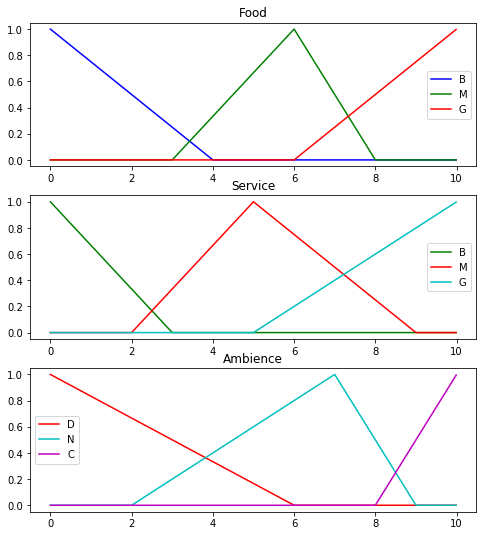

In [37]:
input_parameters(3)

In [256]:
r1={'temperature': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0], 'humidity': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0], 'fan speed': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]}

In [257]:
m1={'temperature': {'cold': [1.0, 0.8, 0.6, 0.4, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0], 'med': [0.0, 0.0, 0.0, 0.3333333333333333, 0.6666666666666666, 1.0, 0.6666666666666666, 0.3333333333333333, 0.0, 0.0], 'hot': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.5, 0.75, 1.0]}, 'humidity': {'low': [1.0, 0.8, 0.6, 0.4, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0], 'med': [0.0, 0.0, 0.0, 0.3333333333333333, 0.6666666666666666, 1.0, 0.6666666666666666, 0.3333333333333333, 0.0, 0.0], 'high': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.5, 0.75, 1.0]}, 'fan speed': {'low': [1.0, 0.5, 0.0, 0.0, 0.0, 0.0], 'med': [0.0, 0.5, 1.0, 0.5, 0.0, 0.0], 'high': [0.0, 0.0, 0.0, 0.3333333333333333, 0.6666666666666666, 1.0]}}

In [258]:
i=[6, 1]

In [312]:
rules(r1,m1)

1:low
2:med
3:high
Enter value when temperature is cold, humidity is low, :1
Enter value when temperature is cold, humidity is med, :2
Enter value when temperature is cold, humidity is high, :3
Enter value when temperature is med, humidity is low, :2
Enter value when temperature is med, humidity is med, :2
Enter value when temperature is med, humidity is high, :3
Enter value when temperature is hot, humidity is low, :3
Enter value when temperature is hot, humidity is med, :3
Enter value when temperature is hot, humidity is high, :3
[(('temperature', 'cold'), ('humidity', 'low')), (('temperature', 'cold'), ('humidity', 'med')), (('temperature', 'cold'), ('humidity', 'high')), (('temperature', 'med'), ('humidity', 'low')), (('temperature', 'med'), ('humidity', 'med')), (('temperature', 'med'), ('humidity', 'high')), (('temperature', 'hot'), ('humidity', 'low')), (('temperature', 'hot'), ('humidity', 'med')), (('temperature', 'hot'), ('humidity', 'high'))] {1: 'low', 2: 'med', 3: 'high'} 

In [313]:
t1=[(('temperature', 'cold'), ('humidity', 'low')), (('temperature', 'cold'), ('humidity', 'med')), (('temperature', 'cold'), ('humidity', 'high')), (('temperature', 'med'), ('humidity', 'low')), (('temperature', 'med'), ('humidity', 'med')), (('temperature', 'med'), ('humidity', 'high')), (('temperature', 'hot'), ('humidity', 'low')), (('temperature', 'hot'), ('humidity', 'med')), (('temperature', 'hot'), ('humidity', 'high'))]

In [308]:
p1={1: 'low', 2: 'med', 3: 'high'}

In [309]:
p2=['low', 'med', 'high']

In [310]:
p3=[1, 2, 3, 2, 2, 3, 3, 3, 3]

Enter input value for temperature:3
Enter input value for humidity:6
{'temperature': {'cold': 0.4, 'med': 0.3333333333333333, 'hot': 0.0}, 'humidity': {'low': 0.0, 'med': 0.6666666666666666, 'high': 0.25}}


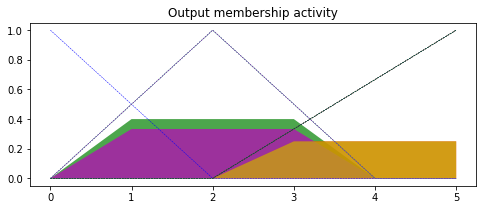

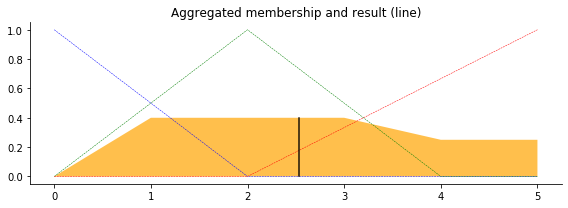

In [323]:
input_val_mem(m1,t1,r1,p1,p2,p3)